In [36]:
import pandas as pd
from pandas import DataFrame, Series

import os, sqlite3
path = "bus.db"
assert os.path.exists(path)

### make sure that already have this data file from a previous lecture

https://github.com/tylerharter/caraza-harter-com/blob/master/tyler/meena/cs220/f20/materials/lectureDemo_code/lec-36/bus.db


### Lecture 38:  pie and bar charts
<pre>
- matplotlib is a module that provides MATLAB-style plots
- matplotlib integrates with pandas, just like sqlite3 integrates with pandas
- Series.plot.pie(), .bar()
- DataFrame.plot.pie(), .bar()


In [37]:
import matplotlib

# this allows Jupyter Notebook to draw the plot in an output cell
%matplotlib inline

### To start, let's create a pandas Series and make a pie chart
<pre>
1. pandas Series can be made using list or dictionary.
2. pandas Series has both index (similar to dictionary key) and integer position (similar to list index).
3. While creating a brand new list, index and integer position are the same.

<AxesSubplot:ylabel='None'>

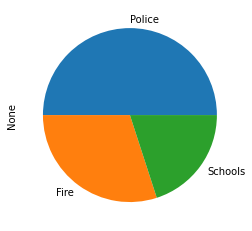

In [38]:
s = Series({"Police": 5000000, "Fire": 3000000, "Schools": 2000000})
s.plot.pie() # Doesn't say the absolute numbers for each department

# this is good enough for now 
# for more options, take a look at
# https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.pie.html

### Let's make a Bar Chart from the same series
<pre>
- when a bar chart is created, an object that controls the axes is returned
- you can call methods on this axes object

Text(0.5, 1.0, 'Annual City Spending')

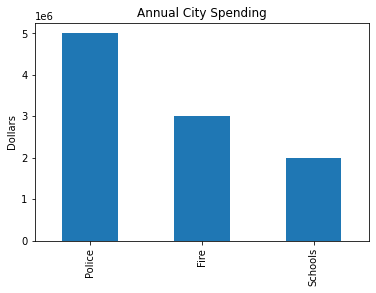

In [39]:
# store the plot in an object variable and then call methods on it
axes = s.plot.bar()
axes.set_ylabel("Dollars")
axes.set_title("Annual City Spending")


[Text(0, 0, 'Police'), Text(1, 0, 'Fire'), Text(2, 0, 'Schools')]

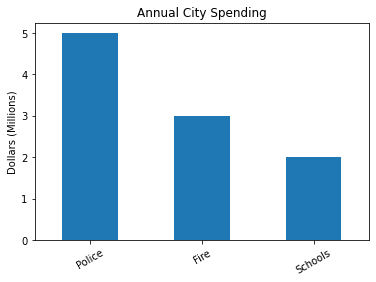

In [40]:
# better bar chart: 
axes = (s / 1000000).plot.bar()  # arithmetic on a Series helps scale the numbers
axes.set_ylabel("Dollars (Millions)")
axes.set_title("Annual City Spending")
axes.set_xticklabels(list(s.index), rotation = 30)


In [45]:
list(s.index)

['Police', 'Fire', 'Schools']

[Text(0, 0, 'Police'), Text(1, 0, 'Fire'), Text(2, 0, 'Schools')]

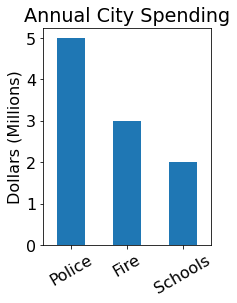

In [46]:
# even better bar chart:
matplotlib.rcParams["font.size"] = 16
axes = (s / 1000000).plot.bar(figsize=(3,4))
axes.set_ylabel("Dollars (Millions)")
axes.set_title("Annual City Spending")
axes.set_xticklabels(list(s.index), rotation = 30)

Text(0.5, 1.0, 'Annual City Spending')

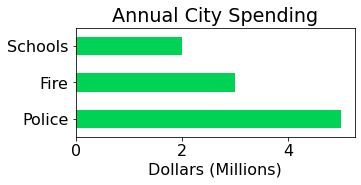

In [51]:
# horizontal bar chart:  figsize and labels change
axes = (s / 1000000).plot.barh(figsize=(5,2), color="#00d255")
axes.set_xlabel("Dollars (Millions)")
axes.set_title("Annual City Spending")

### Change bar color by using the argument color= ' ' 
<pre>
- plot.bar(figsize = (width,height ) , color = ??? )
- 8 standard colors: r, g, b, c, m, y, b, w    color = 'm'
- can use RGB Hex colors with a leading #:     color = "#01abf0"
- can use value of grey between 0 and 1        color = 0.6
- can use a tuple with (r, g, b)               color = (0, .3, .4)
</pre>

In [15]:
# Go back to the bar chart above and change its color

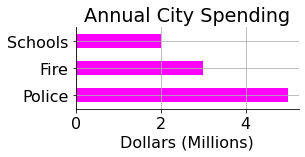

In [54]:
# Final touches:  Making a Grid, removing margins
axes = (s / 1000000).plot.barh(figsize=(4, 1.5), color='magenta')
axes.set_xlabel("Dollars (Millions)")
axes.set_title("Annual City Spending")
axes.grid()
axes.spines['right'].set_visible(False)  # also top, bottom, left
axes.spines['top'].set_visible(False)  # also top, bottom, left

In [20]:
# 

### Let's plot the bus.db data

In [55]:
import os, sqlite3
path = "bus.db"
assert os.path.exists(path)
conn = sqlite3.connect(path)

In [56]:
# this command shows us how our database is set up
query = "select * from sqlite_master" #shows us how this database is setup
pd.read_sql(query, conn)

,type,name,tbl_name,rootpage,sql
0,table,boarding,boarding,2,"CREATE TABLE ""boarding"" (\n""index"" INTEGER,\n ..."
1,index,ix_boarding_index,boarding,3,"CREATE INDEX ""ix_boarding_index""ON ""boarding"" ..."
2,table,routes,routes,55,"CREATE TABLE ""routes"" (\n""index"" INTEGER,\n ""..."
3,index,ix_routes_index,routes,57,"CREATE INDEX ""ix_routes_index""ON ""routes"" (""in..."


In [57]:
# complete the query to show what is in boarding
query = 'select * from boarding'
pd.read_sql(query, conn)

,index,StopID,Route,Lat,Lon,DailyBoardings
0,0,1163,27,43.073655,-89.385427,1.03
1,1,1163,47,43.073655,-89.385427,0.11
2,2,1163,75,43.073655,-89.385427,0.34
3,3,1164,6,43.106465,-89.340021,10.59
4,4,1167,3,43.077867,-89.369993,3.11
...,...,...,...,...,...,...
3967,3967,6533,67,43.057329,-89.510756,16.88
3968,3968,6539,15,43.064361,-89.517233,15.53
3969,3969,6541,3,43.049934,-89.478167,2.56
3970,3970,6543,70,43.093289,-89.501726,0.11


In [67]:
# Let's plot the top 5 routes by total ridership
query = """SELECT ROUTE, sum(DailyBoardings) AS riders 
      from boarding 
      group by Route 
      order by riders DESC 
"""
df = pd.read_sql(query, conn)
df = df.set_index("Route")
df

,riders
Route,
80,10211.79
2,4808.03
6,4537.02
10,4425.23
3,2708.55


<AxesSubplot:xlabel='Route'>

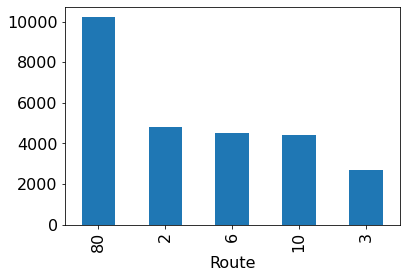

In [69]:
# let's grab the Ridership data as a series

s = df["riders"]
s.plot.bar()

In [73]:
query = """SELECT ROUTE, sum(DailyBoardings) AS riders 
      from boarding 
      group by Route 
      order by riders DESC 
"""
df = pd.read_sql(query, conn)
df = df.set_index("Route")


s = df["riders"].iloc[:5]
s

Route
80    10211.79
2      4808.03
6      4537.02
10     4425.23
3      2708.55
Name: riders, dtype: float64

In [75]:
s.loc[80]

10211.79

In [76]:
s.iloc[1]

4808.030000000001

In [77]:
s['other'] = df["riders"].iloc[5:].sum()
s['other']

29296.56

In [78]:
s

Route
80       10211.79
2         4808.03
6         4537.02
10        4425.23
3         2708.55
other    29296.56
Name: riders, dtype: float64

Text(0.5, 1.0, 'Daily ridership')

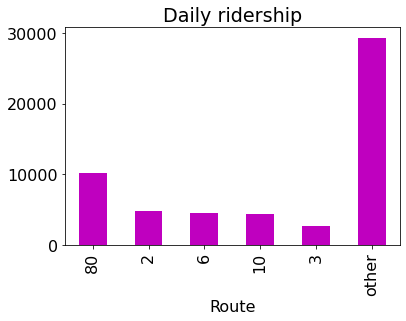

In [83]:
axes= s.plot.bar(color='m')
axes.set_title("Daily ridership")